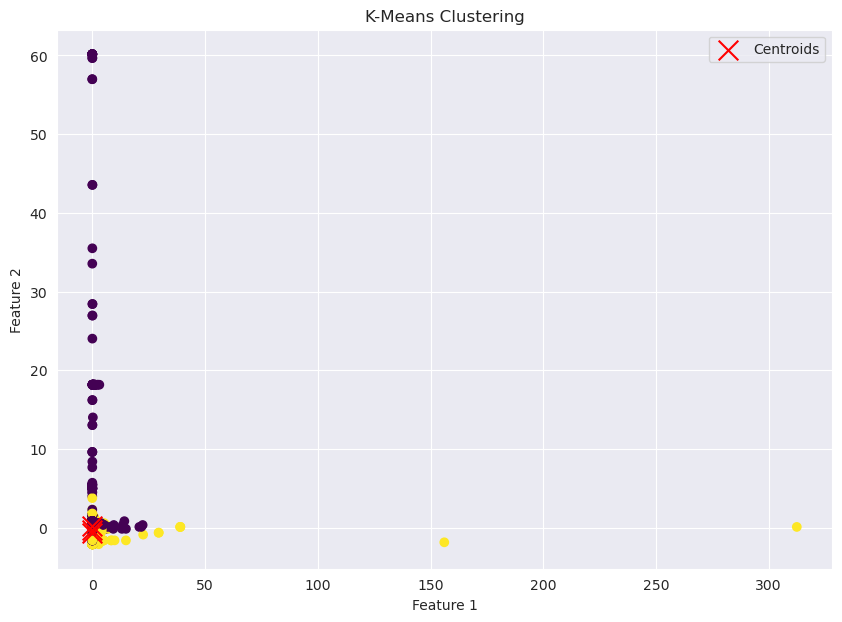

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../OLD_SCRIPT/DatasetmalwareExtrait.csv')

# Preprocess the data
# Assuming the dataset has a 'label' column indicating malware or benign and feature columns for clustering
features = data.drop(['legitimate'], axis=1)  # Drop the label column for clustering

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
optimal_clusters = 3  # Example: choose 3 clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 7))

# Assuming the first two features for 2D plotting (can be adjusted)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', marker='o')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()